# Example 8: Extracting shape features from fossil teeth of cichlids

This example demonstrates how basic and complex features of tooth-shapes are extracted from images containing single and multiple microscope images. Two separate phenopype projects are used for better organization (single tooth and multiple tooth per images). 

All images are kindly provided by Ole Seehausen.

<center>
<div style="width:600px; text-align: left" >
    
![Cichlid jaw](_figures/project_8_jaw.jpg)
**Fig. 1** - Teeth of haplochromine cichlids, still attached to the jaw.
    
</div>
</center>

## Preparation - both cases

In [1]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "project_8"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)


## Single teeth

These are single-tooth images where the background is brighter than the teeth, and also quite noisy. The challenges here lie in preventing unwanted objects from being detected (e.g. the checkered paper). In this case, the easiest way is to draw a rectangle mask around the object. Furthermore, the scale bar needs to be measured in every image because it varies in size between images. This is because the microscope software returns non-standardized scale bars that vary between images. However, this is done quickly using `create_reference`.

<div style="display: flex; flex-fow: row wrap; text-align:left; gap: 10px;">
    
<div class="col-md-6" style="flex: 1 1 0px;">
    
![Before - single tooth case](_figures/project_8_before1.jpg)
    
</div>
    
<div class="col-md-6" style="flex: 1 1 0px;">

![After - single tooth case](_figures/project_8_after1.jpg)
    
</div>
</div>

### Preparation - single tooth

In [2]:
## set template name 
name_stub = "project_8a"
template_name = "gallery_" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_8a.yaml


### Project

In [3]:
proj = pp.Project("project_a")

--------------------------------------------
Found existing project root directory - loading from:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_a

Project "project_a" successfully loaded with 3 images
--------------------------------------------


In [4]:
## add tooth-images from the data folder, but exclude the images containing multiple teeth 
proj.add_files(image_dir = r"../../gallery/data", include="cichlid", exclude="multi")

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: cichlid, exclude: multi, mode: copy, recursive: False, resize: False, unique: path

Found image cichlid1.jpg - 0__cichlid1 already exists (overwrite=False)
Found image cichlid2.jpg - 0__cichlid2 already exists (overwrite=False)
Found image cichlid3.jpg - 0__cichlid3 already exists (overwrite=False)

Found 3 files
--------------------------------------------


In [5]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_a\data\0__cichlid1\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_a\data\0__cichlid2\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_a\data\0__cichlid3\pype_config_v1.yaml (overwritten)


In [6]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"mask": ["a"],
"reference": ["a"],
"contour": ["a"],
"shape_features": ["a"]
}
Fixed method name
updating pype config file


------------+++ new pype iteration 2022-01-20 18:08:39 +++--------------




PREPROCESSING
create_mask
- loaded existing annotation of type "mask" with ID "a": skipping (edit=False)
create_reference
- loaded existing annotation of type "reference" with ID "a": skipping (edit=False)


SEGMENTATION
blur
threshold
- decompose image: using green channel
- including pixels from 1 drawn masks 
- excluding pixels from reference
morphology
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 1 contours that match criteria


MEASUREMENT
compute_shape_features
- loaded existing annotation of type "shape_features" with ID "a": overwriting (edit=overwrite)


VISUALIZATION
select_canvas
- green channel
dr

In [7]:
## this collects all annotations 
proj.collect_results(tag="v1", files="annotations",  folder="annotations", overwrite=True)

Search string: ['annotations_v1']
Collected annotations_v1.json from 0__cichlid1
0__cichlid1_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_a\results\annotations\0__cichlid1_annotations_v1.json (overwritten).
Collected annotations_v1.json from 0__cichlid2
0__cichlid2_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_a\results\annotations\0__cichlid2_annotations_v1.json (overwritten).
Collected annotations_v1.json from 0__cichlid3
0__cichlid3_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_a\results\annotations\0__cichlid3_annotations_v1.json (overwritten).



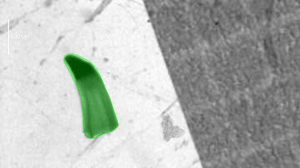
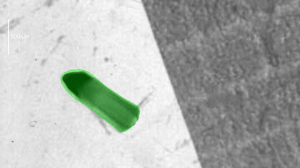
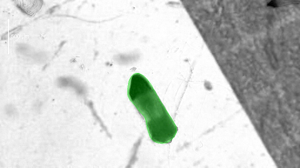


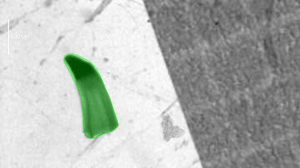
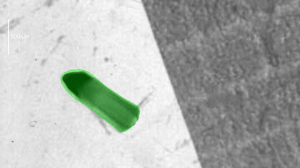
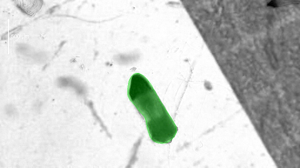

In [8]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)

## Multiple teeth

Now we will implement the same procedure for the images with multiple teeth, which require only a slightly altered configuration file: the maine difference that we are excluding the reference scale (exclude when drawing the mask with `include: false`), and some slightly altered settigngs for `threshold` (`invert:true` considers inverted values of the images, to make the dark background light and the bright teeth dark for the algorithm to work).

<div style="display: flex; flex-fow: row wrap; text-align:left; gap: 10px;">
        
<div class="col-md-6" style="flex: 1 1 0px;">
    
![Before](_figures/project_8_before2.jpg)
    
</div>
    
<div class="col-md-6" style="flex: 1 1 0px;">

![After](_figures/project_8_after2.jpg)
    
</div>
        
</div>

### Preparation - multiple teeth

In [9]:
name_stub = "project_8b"

## set template name 
template_name = "gallery_" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_8b.yaml


In [10]:
proj = pp.Project("project_b")

--------------------------------------------
Found existing project root directory - loading from:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_b

Project "project_b" successfully loaded with 3 images
--------------------------------------------


In [11]:
## add the images containing multiple teeth
proj.add_files(image_dir = r"../../gallery/data", include="cichlid_multi")

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: cichlid_multi, exclude: [], mode: copy, recursive: False, resize: False, unique: path

Found image cichlid_multi1.jpg - 0__cichlid_multi1 already exists (overwrite=False)
Found image cichlid_multi2.jpg - 0__cichlid_multi2 already exists (overwrite=False)
Found image cichlid_multi3.jpg - 0__cichlid_multi3 already exists (overwrite=False)

Found 3 files
--------------------------------------------


In [12]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_b\data\0__cichlid_multi1\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_b\data\0__cichlid_multi2\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_8\project_b\data\0__cichlid_multi3\pype_config_v1.yaml (overwritten)


In [13]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"mask": ["a"],
"reference": ["a"],
"contour": ["a"],
"shape_features": ["a"]
}
updating pype config file


------------+++ new pype iteration 2022-01-20 18:08:55 +++--------------




PREPROCESSING
create_mask
- loaded existing annotation of type "mask" with ID "a": skipping (edit=False)
create_reference
- loaded existing annotation of type "reference" with ID "a": skipping (edit=False)


SEGMENTATION
blur
threshold
- multichannel image supplied, converting to grayscale
- decompose image: using gray channel
- excluding pixels from 1 drawn masks 
- excluding pixels from reference
morphology
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 37 contours that match criteria


MEASUREMENT
compute_shape_features
- loaded existing annotation of type "shape_features" with ID "a": overwriting (edit=overwrite)


VISUALIZA

C:\Anaconda3\envs\pp_dev\lib\site-packages\ipyplot\_utils.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(seq)



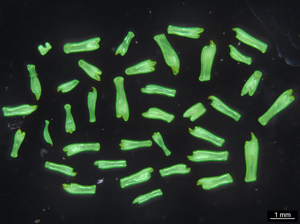
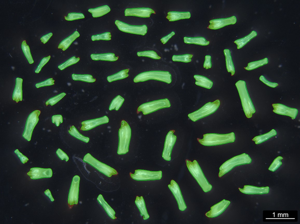
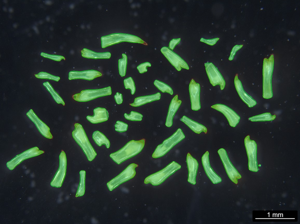


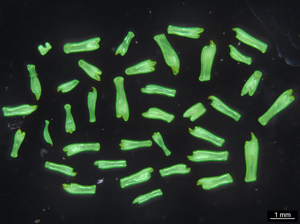
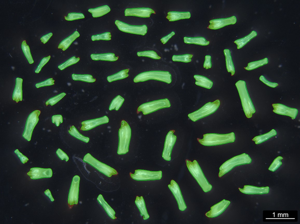
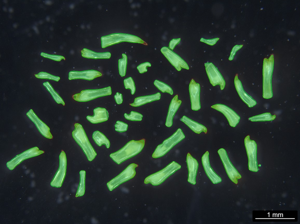

In [14]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)